# Threerra Example

First, we import the necessary packages for the correct execution of our module.

In [ ]:
import threerra # Load threerra

import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
# Load IMB Quantum credentials
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

It's important to choose a backend that's compatible with Qiskit Pulse, or else the Threerra Module won't be able to be executed. In this case, we use the open-access 1 qubit "ibmq_armonk" Quantum Processor, which is available for free.

In [3]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

# Testing different gates and drawing the pulse schedule

The first step is to create a quantum circuit with a given backend. This class have a series of pulses already implemented acting on both $01$ and $12$ subspaces, like $X$ gates, rotation gates $R_x(\theta)$, and more (read Documentation for more details). For the rotation gates, the user needs to also specify a given angle. To better visualize what's beeing applied, the function draw() shows the whole pulse schedule in detail.

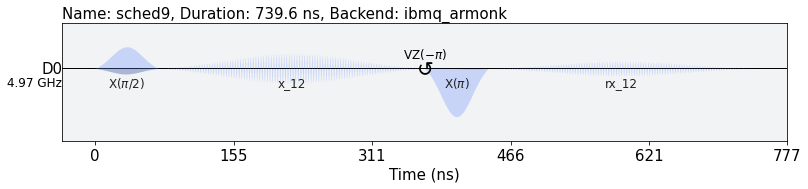

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)                     # Initialize the quantum circuit
qc.rx_01(np.pi/2)                                          # Apply rx gate with angle np.pi/2 in the subspace 01
qc.x_01()                                                  # Apply x gate in the subspace 01
qc.x_12()                                                  # Apply x gate in the subspace 12
qc.rz(np.pi)                                               # Apply rz gate with angle np.pi
qc.rx_12(np.pi/2)                                          # Apply rx gate with angle np.pi/2 in the subspace 12
qc.draw()    

# Test calibrations

Before we make a real experiment, it's important to calibrate the $0\rightarrow1$, $1\rightarrow2$ frequencies, and also the $0\rightarrow1$, $1\rightarrow2$ $\pi$ pulse amplitudes, using the following functions:

In [5]:
# Calibrate the 0 --> 1 frequency using a frecuency sweep.


#qc.calibrate_freq_01()

Calibrating qubit_freq_est_01...
Job Status: job has successfully run
qubit_freq_est_01 updated from 4.971595089951107GHz to 4.971583252011542GHz.


In [6]:
# Calibrate the 0 --> 1 \pi pulse with a Rabi experiment


#qc.calibrate_pi_amp_01()

Calibrating pi_amp_01...
Job Status: job has successfully run
pi_amp_01 updated from 0.1556930479027419 to 0.25020339265292146.


In [7]:
# Calibrate the 1 --> 2 frequency using a frecuency sweep and the sideband method.


#qc.calibrate_freq_12()

Calibrating qubit_freq_est_12...
Job Status: job has successfully run
qubit_freq_est_12 updated from 4.624402158468281GHz to 4.622937542467993GHz.


In [8]:
# Calibrate the 1 --> 2 \pi pulse with a Rabi experiment and the sideband method.


#qc.calibrate_pi_amp_12()

Calibrating pi_amp_12...
Job Status: job has successfully run
pi_amp_12 updated from 0.2797548240848574 to 0.3284615055672541.


# Test Measurement 

In the following examples, we will test the measurement function, and compare our results with the expected theoretical values. After the calibrations are ready, we import the functions necessary to recover the experiments data and both of our discriminators, the nearest centroid (default configuration) and LDA (Linear Discriminant Analysis) discriminator.

In [9]:
from threerra.tools import get_counts

from threerra.discriminators.nearest_discriminator import discriminator as nst_disc
from threerra.discriminators.LDA_discriminator import discriminator as lda_disc

The following circuit takes a $|0\rangle$ state and returns a $|2\rangle$ state after applying the gates $X_{01}$ and $X_{12}$. We then apply a measurement pulse to retrieve the data when we execute the circuit.

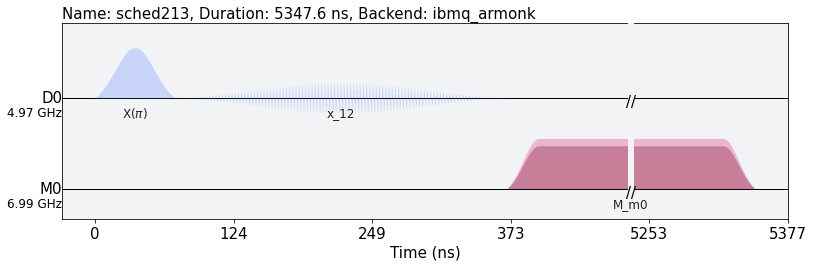

In [10]:
qc2 = threerra.QuantumCircuit3(backend)
qc2.x_01()
qc2.x_12()
qc2.measure()
qc2.draw()

Next, we execute the circuit. The job_monitor function tells us the status of the job.

In [11]:
job2 = qc2.run()
job_monitor(job2)

Job Status: job has successfully run


After the job is done, we get the job's data using the result() function, and apply the get_counts() function with both of our discriminators, to get the number of counts per state.

In [12]:
result2 = job2.result()

In [13]:
counts_nst2 = get_counts(result2, discriminator=nst_disc)
counts_lda2 = get_counts(result2, discriminator=lda_disc)

In [14]:
state2_teo = {'0': 0, '1': 0, '2': 1024}

Finally, we compare the results using both discriminators with the theoretical value with a histogram plot.

In [15]:
comparision2 = [counts_nst2, counts_lda2, state2_teo]

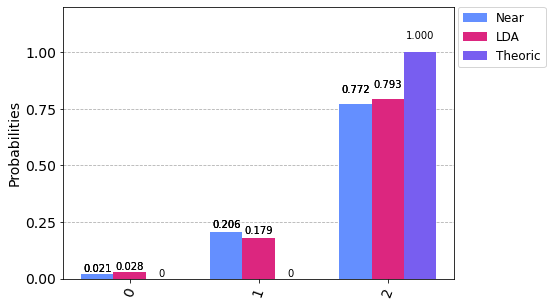

In [16]:
plot_histogram(comparision2, legend=['Near','LDA', 'Theoric'])

Finally, we intend to obtain a superposition $\frac{1}{\sqrt{2}}\left(|1\rangle + |2\rangle\right)$. To achieve this, we construct ourselves a Hadamard gate $H_{12}$ that acts onto the $12$ subspace. This gate is constructed as follows:

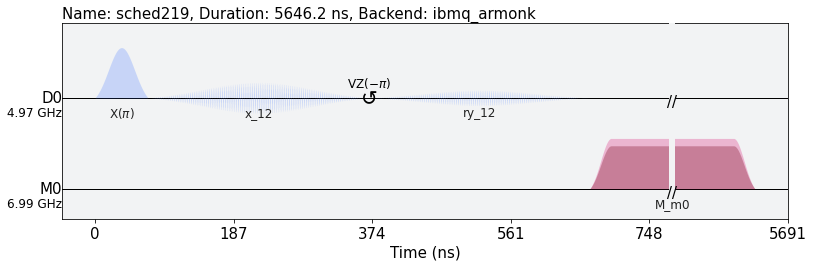

In [24]:
qc12 = threerra.QuantumCircuit3(backend)
qc12.x_01()
qc12.x_12()
qc12.ry_12(np.pi/2.0)
qc12.measure()
qc12.draw()

In [25]:
job12 = qc12.run()
job_monitor(job12)

Job Status: job has successfully run


In [26]:
result12 = job12.result()

In [27]:
counts_lda12 = get_counts(result12, discriminator=lda_disc)
counts_nst12 = get_counts(result12, discriminator=nst_disc)


In [28]:
state12_teo = {'0': 0, '1': 512, '2': 512}

In [29]:
comparision12 = [counts_nst12, counts_lda12, state12_teo]

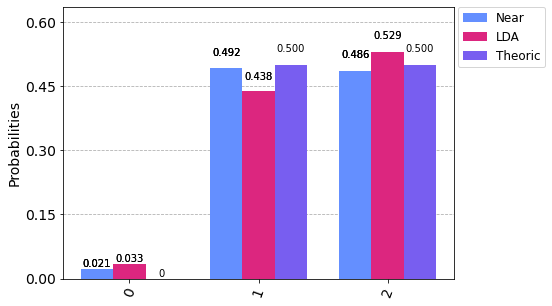

In [30]:
plot_histogram(comparision12, legend=['Near','LDA', 'Theoric'])